<a href="https://colab.research.google.com/github/andrewRowlinson/data-science/blob/master/football/heatmaps_complicated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplsoccer

In [2]:
from mplsoccer import VerticalPitch
from mplsoccer.heatmap import _BinnedStatisticResult
import numpy as np

In [3]:
p = VerticalPitch(pitch_type='statsbomb', half=True, line_zorder=1.5, line_color='None')

In [4]:
x = np.random.uniform(0, 120, 100)
y = np.random.uniform(0, 80, 100)

Heatmap 1

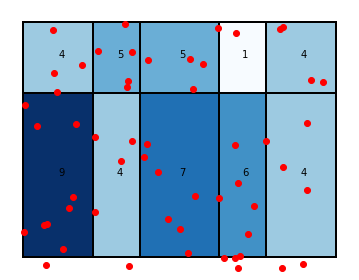

In [5]:
fig, ax = p.draw()
sc = p.scatter(x, y, zorder=2, ax=ax, color='red')
x_bin1 = np.array([p.dim.center_length, p.dim.penalty_area_right, p.dim.right])
y_bin1 = np.sort([p.dim.top, p.dim.penalty_area_top, p.dim.six_yard_top,
                   p.dim.six_yard_bottom, p.dim.penalty_area_bottom, p.dim.bottom])
bs = p.bin_statistic(x=x, y=y, statistic='count', bins=(x_bin1, y_bin1))
hm = p.heatmap(bs, ax=ax, zorder=1, cmap='Blues', edgecolor='black')
txt = p.label_heatmap(bs, exclude_zeros=True, ax=ax, str_format='{0:.0f}')

Heatmap 2

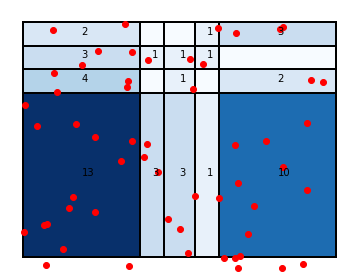

In [6]:
fig, ax = p.draw()
sc = p.scatter(x, y, zorder=2, ax=ax, color='red')
x_bin2 = np.linspace(p.dim.penalty_area_right, p.dim.right, num=4)
x_bin2 = np.insert(x_bin2, 0,  p.dim.center_length)
y_bin2 = np.sort([p.dim.top, p.dim.six_yard_top, p.dim.goal_top, p.dim.goal_bottom,
                 p.dim.six_yard_bottom, p.dim.bottom])
bs = p.bin_statistic(x=x, y=y, statistic='count', bins=(x_bin2, y_bin2))
hm = p.heatmap(bs, ax=ax, zorder=1, cmap='Blues', edgecolor='black')
txt = p.label_heatmap(bs, exclude_zeros=True, ax=ax, str_format='{0:.0f}')

Combining the heatmaps

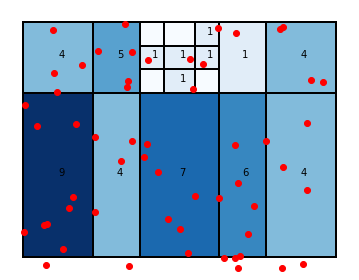

In [7]:
x_bin1 = np.array([p.dim.center_length, p.dim.penalty_area_right, p.dim.right])
y_bin1 = np.sort([p.dim.top, p.dim.penalty_area_top, p.dim.six_yard_top,
                   p.dim.six_yard_bottom, p.dim.penalty_area_bottom, p.dim.bottom])
bs1 = p.bin_statistic(x=x, y=y, statistic='count', bins=(x_bin1, y_bin1))
result1 = _BinnedStatisticResult(bs1['statistic'][:2, :2], bs1['x_grid'][:3, :3],
                                 bs1['y_grid'][:3, :3], bs1['cx'][:2, :2], bs1['cy'][:2, :2])._asdict()
result2 = _BinnedStatisticResult(bs1['statistic'][-2:, -2:], bs1['x_grid'][-3:, -3:],
                                 bs1['y_grid'][-3:, -3:], bs1['cx'][-2:, -2:], bs1['cy'][-2:, -2:])._asdict()  
result3 = _BinnedStatisticResult(bs1['statistic'][2:3, :1], bs1['x_grid'][2:4, :2],
                                 bs1['y_grid'][2:4, :2], bs1['cx'][2:3, :1], bs1['cy'][2:3, :1])._asdict()       

x_bin2 = np.linspace(p.dim.penalty_area_right, p.dim.right, num=4)
x_bin2 = np.insert(x_bin2, 0,  p.dim.center_length)
y_bin2 = np.sort([p.dim.top, p.dim.six_yard_top, p.dim.goal_top, p.dim.goal_bottom,
                 p.dim.six_yard_bottom, p.dim.bottom])
bs2 = p.bin_statistic(x=x, y=y, statistic='count', bins=(x_bin2, y_bin2))

result4 = _BinnedStatisticResult(bs2['statistic'][1:-1, 1:], bs2['x_grid'][1:-1, 1:],
                                 bs2['y_grid'][1:-1, 1:], bs2['cx'][1:-1, 1:], bs2['cy'][1:-1, 1:])._asdict()                                             
bs_all = [result1, result2, result3, result4]

fig, ax = p.draw()
sc = p.scatter(x, y, zorder=2, ax=ax, color='red')
hm = p.heatmap_positional(bs_all, ax=ax, zorder=1, cmap='Blues', edgecolor='black')
txt = p.label_heatmap(bs_all, exclude_zeros=True, str_format='{0:.0f}', ax=ax)